In [1]:
# Cargamos bibliotecas útiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df1 = pd.read_csv('sargento_201117.csv', names=['Date-Time', 'AbsPres', 'Temp', 'WaterLevel'], skiprows=2, skipfooter=1, sep=',', engine='python')
df2 = pd.read_csv('sargento-salinidad-201117.csv', names=['Date-Time', 'Cond-High-Rng', 'Temp', 'SpecificC', 'Salinity'], skiprows=2, sep=',')
df2 = df2.drop(df2.index[:1])
df2.head()

,Date-Time,Cond-High-Rng,Temp,SpecificC,Salinity
2,10/26/2017/13:00:00,54525.5,24.91,54622.1,36.1588
3,10/26/2017/13:15:00,54525.5,24.82,54719.0,36.2311
4,10/26/2017/13:30:00,54525.5,24.76,54783.8,36.2794
5,10/26/2017/13:45:00,54525.5,24.75,54794.6,36.2875
6,10/26/2017/14:00:00,54525.5,24.73,54816.2,36.3036


In [3]:
# Adaptamos el formato de la columna de Fecha-Tiempo

df1['Ndate'] = pd.to_datetime(df1['Date-Time'], format='%m/%d/%Y/%H:%M:%S')
df2['Ndate'] = pd.to_datetime(df2['Date-Time'], format='%m/%d/%Y/%H:%M:%S')

In [24]:
# Creamos un dataframe con los datos que nos interesan

df3 = pd.concat([df1['Date-Time'], df1['WaterLevel'],  df2['Salinity'], df1['Temp']], axis=1, keys=['Date-Time', 'WaterLevel', 'Salinity','Temp'])

# Extraemos también variables de tiempo mes y días

df3['Ndate'] = pd.to_datetime(df3['Date-Time'], format='%m/%d/%Y/%H:%M:%S')
df3['month'] = df3['Ndate'].dt.month
df3['day'] = df3['Ndate'].dt.day

df3.head()

,Date-Time,WaterLevel,Salinity,Temp,Ndate,month,day
1,10/26/2017/13:00:00,-0.150,NaN,24.448,2017-10-26 13:00:00,10.0,26.0
2,10/26/2017/13:15:00,-0.160,36.1588,24.351,2017-10-26 13:15:00,10.0,26.0
3,10/26/2017/13:30:00,-0.168,36.2311,24.351,2017-10-26 13:30:00,10.0,26.0
4,10/26/2017/13:45:00,-0.173,36.2794,24.351,2017-10-26 13:45:00,10.0,26.0
5,10/26/2017/14:00:00,-0.179,36.2875,24.351,2017-10-26 14:00:00,10.0,26.0


In [5]:
# Información estadística de los datos

df3.describe()

,WaterLevel,Salinity,Temp
count,2394.000000,2394.000000,2394.000000
mean,0.030863,37.479737,23.120883
std,0.235974,0.464974,0.563555
min,-0.288000,36.158800,21.760000
25%,-0.071000,37.151400,22.525000
50%,-0.035000,37.328300,23.388000
75%,0.018750,37.980300,23.484000
max,1.146000,38.994200,24.448000


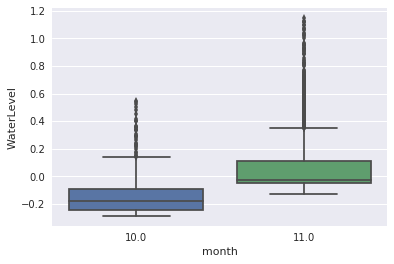

In [25]:
# Boxplot de Nivel del mar
import seaborn as sns

ax = sns.boxplot(x="month", y="WaterLevel", data=df3)
plt.show()

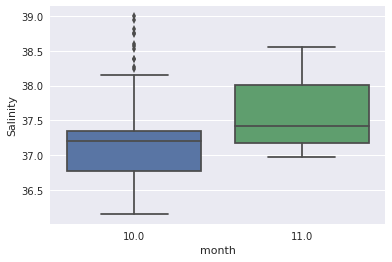

In [26]:
# Boxplot de Salinidad

ax = sns.boxplot(x="month", y="Salinity", data=df3)
plt.show()

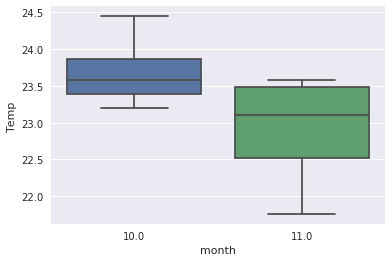

In [27]:
# Boxplot de Salinidad

ax = sns.boxplot(x="month", y="Temp", data=df3)
plt.show()

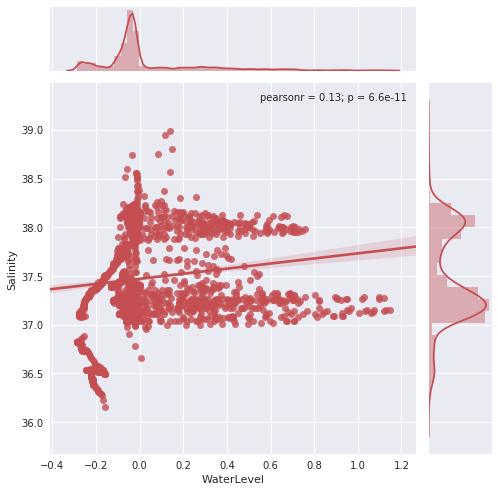

In [14]:
# Correlación de Pearson entre Nivel del mar y Salinidad

sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("WaterLevel", "Salinity", data=df3, kind="reg",
                   color="r", size=7)
plt.show(g)

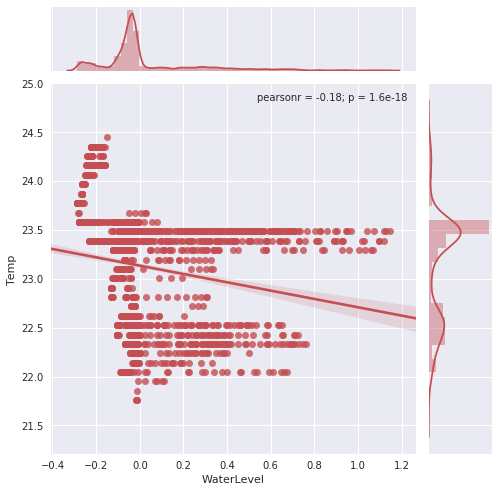

In [15]:
# Correlación de Pearson entre Nivel del mar y Temperatura

sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("WaterLevel", "Temp", data=df3, kind="reg",
                   color="r", size=7)
plt.show(g)

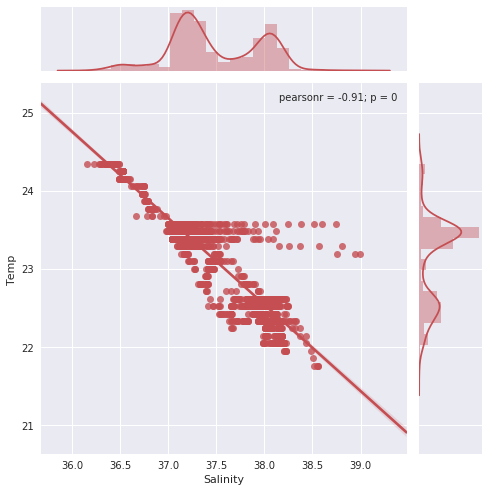

In [16]:
# Correlación de Pearson entre Salinidad y Temperatura

sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Salinity", "Temp", data=df3, kind="reg",
                   color="r", size=7)
plt.show(g)

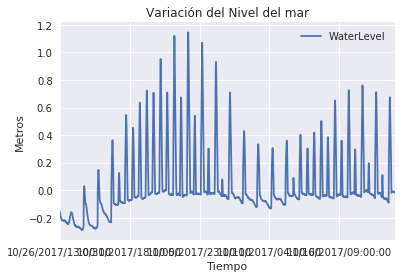

In [42]:
# Gráfica de Nivel del mar contra tiempo

df4 = df3[['Date-Time','WaterLevel']]
plt.figure(); df4.plot(x='Date-Time'); plt.legend(loc='best')
plt.title('Variación del Nivel del mar')
plt.ylabel('Metros')
plt.xlabel('Tiempo')
plt.grid(True)
plt.show()

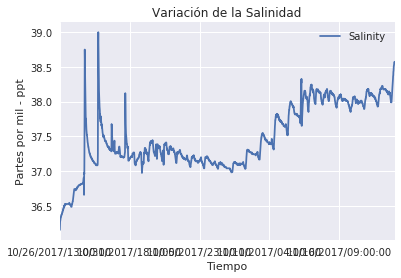

In [18]:
# Gráfica de Salinidad contra tiempo

df5 = df3[['Date-Time','Salinity']]
plt.figure(); df5.plot(x='Date-Time'); plt.legend(loc='best')
plt.title('Variación de la Salinidad')
plt.ylabel('Partes por mil - ppt')
plt.xlabel('Tiempo')
plt.grid(True)
plt.show()

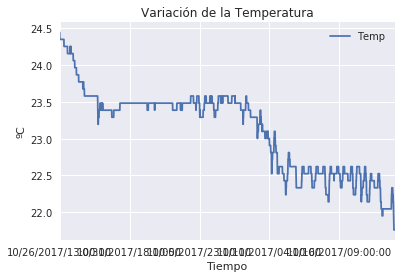

In [19]:
# Gráfica de Temperatura contra tiempo

df6 = df3[['Date-Time','Temp']]
plt.figure(); df6.plot(x='Date-Time'); plt.legend(loc='best')
plt.title('Variación de la Temperatura')
plt.ylabel('ºC')
plt.xlabel('Tiempo')
plt.grid(True)
plt.show()

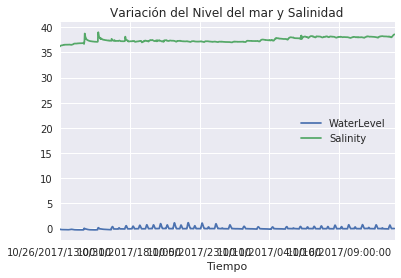

In [20]:
# Gráfica de Nivel del mar y Salinidad contra tiempo

df7 = df3[['Date-Time','WaterLevel','Salinity']]
plt.figure(); df7.plot(x='Date-Time'); plt.legend(loc='best')
plt.title('Variación del Nivel del mar y Salinidad')
plt.xlabel('Tiempo')
plt.grid(True)
plt.show()

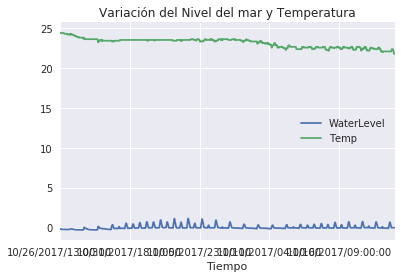

In [28]:
# Gráfica de Nivel del mar y Temperatura contra tiempo

df8 = df3[['Date-Time','WaterLevel','Temp']]
plt.figure(); df8.plot(x='Date-Time'); plt.legend(loc='best')
plt.title('Variación del Nivel del mar y Temperatura')
plt.xlabel('Tiempo')
plt.grid(True)
plt.show()

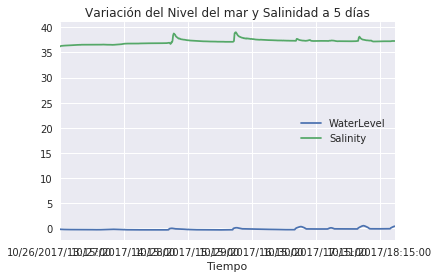

In [51]:
# Gráfica de Nivel del mar y Salinidad contra tiempo a 5 días

df9 = df3[['Date-Time','WaterLevel','Salinity']]
df9n= df9.iloc[1:525]
plt.figure(); df9n.plot(x='Date-Time'); plt.legend(loc='best')
plt.title('Variación del Nivel del mar y Salinidad a 5 días')
plt.xlabel('Tiempo')
plt.grid(True)
plt.show()


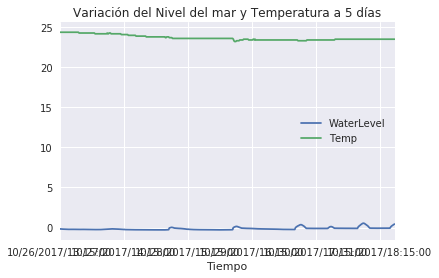

In [52]:
# Gráfica de Nivel del mar y Temperatura contra tiempo a 5 días

df10 = df3[['Date-Time','WaterLevel','Temp']]
df10n= df10.iloc[1:525]
plt.figure(); df10n.plot(x='Date-Time'); plt.legend(loc='best')
plt.title('Variación del Nivel del mar y Temperatura a 5 días')
plt.xlabel('Tiempo')
plt.grid(True)
plt.show()